<a href="https://colab.research.google.com/github/lutfiaizat/assignment/blob/assignment_1/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing relevent libraries:

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode
from IPython.display import Image
import os
import urllib.request
import cv2
import numpy as np

The following is the function to capture a picture from the webcam:

In [ ]:

def take_photo(filename, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

The `take_photo` function was implemented as the following for 3 times:

<IPython.core.display.Javascript object>

Saved to face01.jpg


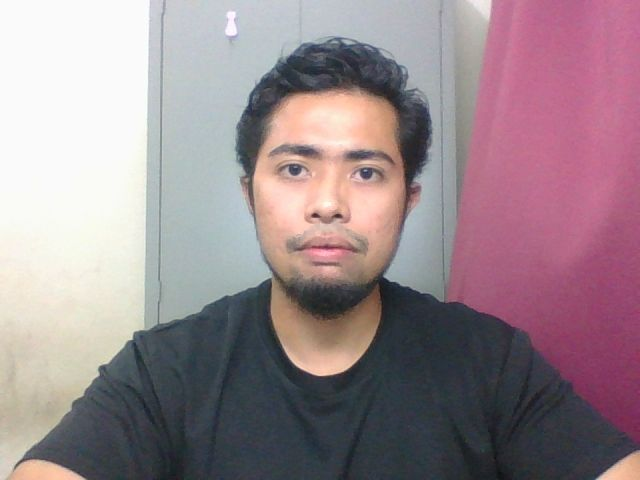

In [ ]:
try:
  imgmaterial = take_photo('face01.jpg')
  print('Saved to {}'.format(imgmaterial))
  
  # Show the image which was just taken.
  display(Image(imgmaterial))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to face02.jpg


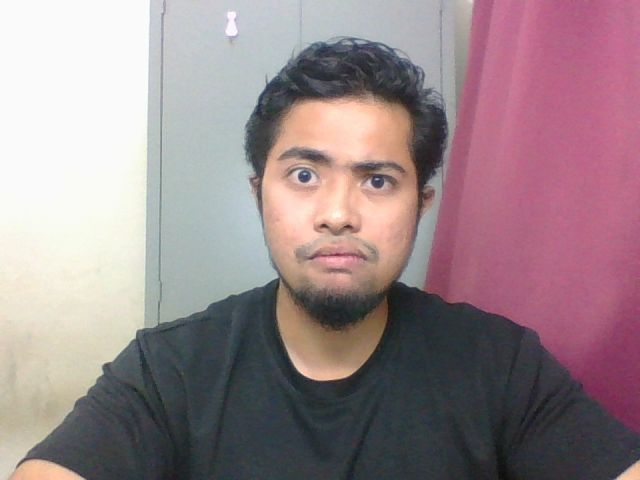

In [ ]:
try:
  imgmaterial = take_photo('face02.jpg')
  print('Saved to {}'.format(imgmaterial))
  
  # Show the image which was just taken.
  display(Image(imgmaterial))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to face03.jpg


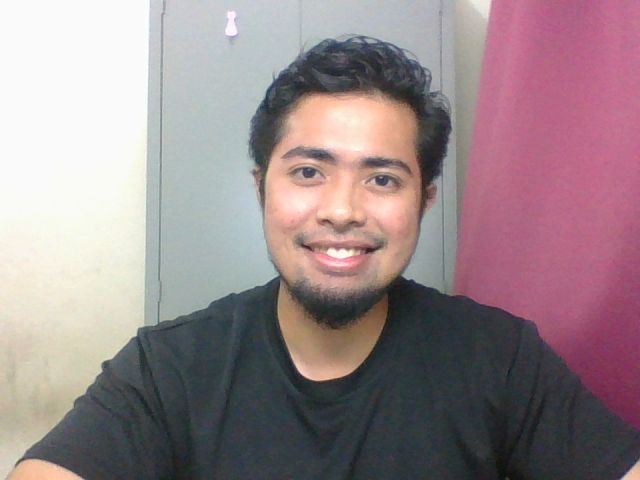

In [ ]:
try:
  imgmaterial = take_photo('face03.jpg')
  print('Saved to {}'.format(imgmaterial))
  
  # Show the image which was just taken.
  display(Image(imgmaterial))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# Retrieving Haar Cascade Classifier Model (Classifier for Face Detection)
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml', 
                           'haarcascade_frontalface_default.xml')

('haarcascade_frontalface_default.xml',
 <http.client.HTTPMessage at 0x7fc9de501f10>)

In [ ]:
# Load the cascade model
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [ ]:
# Load the captured image into 3 variables:
img01 = cv2.imread('./face01.jpg')
img02 = cv2.imread('./face02.jpg')
img03 = cv2.imread('./face03.jpg')

In [ ]:
# Retrieving the images' region that represent face
face01 = face_cascade.detectMultiScale(
    img01,
    scaleFactor=1.5,
    minNeighbors=5,
    minSize=(30, 30))

face02 = face_cascade.detectMultiScale(
    img02,
    scaleFactor=1.5,
    minNeighbors=5,
    minSize=(30, 30))

face03 = face_cascade.detectMultiScale(
    img03,
    scaleFactor=1.5,
    minNeighbors=5,
    minSize=(30, 30))

In [ ]:
# Displaying the array of coordinates that represent face
face01

array([[214,  75, 228, 228],
       [253, 106, 152, 152]], dtype=int32)

In [ ]:
face02

array([[258, 117, 152, 152],
       [223,  85, 228, 228]], dtype=int32)

In [ ]:
face03

array([[232,  79, 228, 228]], dtype=int32)

In [ ]:
# Copying the images that will be used to blur the defined face region
tempImg01 = img01.copy()
maskShape01 = (img01.shape[0], img01.shape[1], 1)
mask01 = np.full(maskShape01, 0, dtype=np.uint8)

tempImg02 = img02.copy()
maskShape02 = (img02.shape[0], img02.shape[1], 1)
mask02 = np.full(maskShape02, 0, dtype=np.uint8)

tempImg03 = img03.copy()
maskShape03 = (img03.shape[0], img03.shape[1], 1)
mask03 = np.full(maskShape03, 0, dtype=np.uint8)

In [ ]:
for (x, y, w, h) in face01:
    
    # Get the center of the face rectangle
    x_center = x + (w/2).astype(int)
    y_center = y + (h/2).astype(int)
    
    # The blur is applied in the area [y:y+h, x:x+w] of the tempImg01 where the face is:
    tempImg01[y:y+h, x:x+w] = cv2.blur(tempImg01[y:y+h, x:x+w] ,(50, 50))
    
    # Draw a circle in the mask image 
    # corresponsing to where the faces are in the original image
    
    cv2.circle(tempImg01 ,(x_center, y_center), int(h / 2), (255, 0, 0))
    cv2.circle(mask01 , (int((x + x + w )/2), int((y + y + h)/2 )), int(h / 2), (255, 0, 0), -1)

for (x, y, w, h) in face02:
    
    # Get the center of the face rectangle
    x_center = x + (w/2).astype(int)
    y_center = y + (h/2).astype(int)
    
    # The blur is applied in the area [y:y+h, x:x+w] of the tempImg02 where the face is:
    tempImg02[y:y+h, x:x+w] = cv2.blur(tempImg02[y:y+h, x:x+w] ,(50, 50))
    
    # Draw a circle in the mask image 
    # corresponsing to where the faces are in the original image
    
    cv2.circle(tempImg02 ,(x_center, y_center), int(h / 2), (255, 0, 0))
    cv2.circle(mask02 , (int((x + x + w )/2), int((y + y + h)/2 )), int(h / 2), (255, 0, 0), -1)

for (x, y, w, h) in face03:
    
    # Get the center of the face rectangle
    x_center = x + (w/2).astype(int)
    y_center = y + (h/2).astype(int)
    
    # Blur the tempImg in the area [y:y+h, x:x+w] aka where the face is.
    tempImg03[y:y+h, x:x+w] = cv2.blur(tempImg03[y:y+h, x:x+w] ,(50, 50))
    
    # Draw a circle in the mask image 
    # corresponsing to where the faces are in the original image
    
    cv2.circle(tempImg03 ,(x_center, y_center), int(h / 2), (255, 0, 0))
    cv2.circle(mask03 , (int((x + x + w )/2), int((y + y + h)/2 )), int(h / 2), (255, 0, 0), -1)

In [ ]:
mask_inv01 = cv2.bitwise_not(mask01)
background_img01 = cv2.bitwise_and(img01, img01, mask = mask_inv01)
foreground_img01 = cv2.bitwise_and(tempImg01, tempImg01, mask = mask01)
blurred01 = cv2.add(background_img01, foreground_img01)

mask_inv02 = cv2.bitwise_not(mask02)
background_img02 = cv2.bitwise_and(img02, img02, mask = mask_inv02)
foreground_img02 = cv2.bitwise_and(tempImg02, tempImg02, mask = mask02)
blurred02 = cv2.add(background_img02, foreground_img02)

mask_inv03 = cv2.bitwise_not(mask03)
background_img03 = cv2.bitwise_and(img03, img03, mask = mask_inv03)
foreground_img03 = cv2.bitwise_and(tempImg03, tempImg03, mask = mask03)
blurred03 = cv2.add(background_img03, foreground_img03)

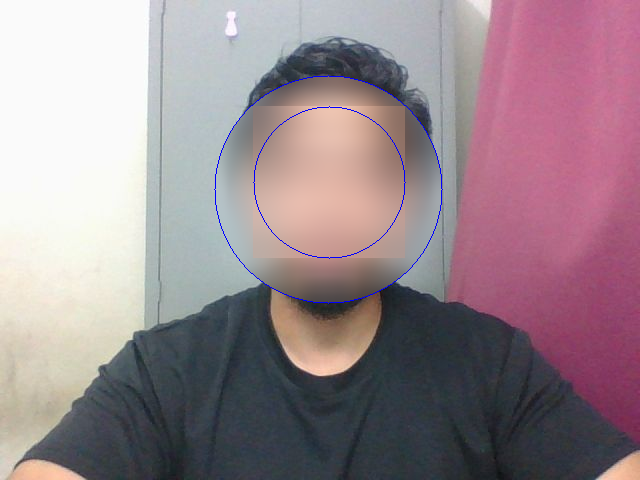

In [ ]:
# Display the output
cv2_imshow(blurred01)

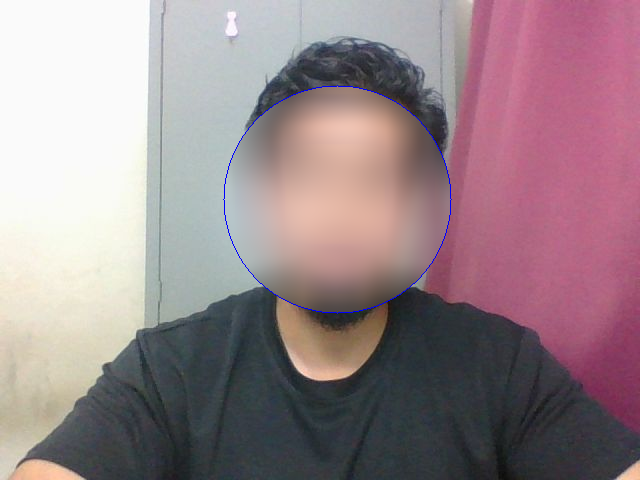

In [ ]:
# Display the output
cv2_imshow(blurred02)

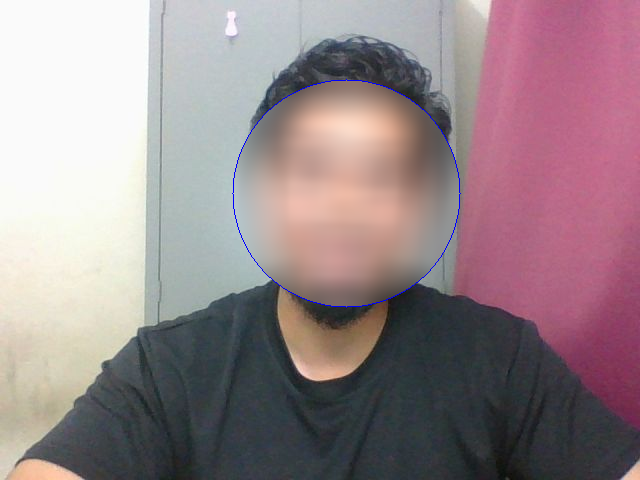

In [ ]:
# Display the output
cv2_imshow(blurred03)